In [1]:
import rs_learn as rsl
from sklearn.preprocessing import StandardScaler


#==============================================================#
# rs_learn: A library for applying machine learning processes  #
# and artificial neural network in Remote Sensing              #
#==============================================================#

#=====================================================================#
# Author:      Reginald Jay L. Argamosa <regi.argamosa@gmail.com>     #  
# Affiliation: University of the Philippines -                        #
#              Training Center for Applied Geodesy and Photogrammetry #
#=====================================================================#



In [2]:
raster_path = r'C:\Users\Dlaniger\Projects\MAPABLE\MLRS_tut'
raster_name = '20190309_ll_raster'
raster_extension = 'tif'

#call Raster_to_dataframe method of rs_learn
rd = rsl.Raster_to_dataframe(raster_path = raster_path,
                                    raster_name = raster_name,
                                    raster_extension = raster_extension) #instantiate class

df = rd.make_df() #convert raster to dataframe


        arguments: 
            raster_path,
            raster_name,
            raster_extension,
            working_space
              
Opening C:\Users\Dlaniger\Projects\MAPABLE\MLRS_tut\20190309-final.tif raster

Rows: 1317
Cols: 1551
Pixel size: 30.0
Number of bands: 7
Projection: PROJCS["WGS 84 / UTM zone 51N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32651"]]


In [3]:
df

,band_1,band_2,band_3,band_4,band_5,band_6,band_7
10942,839.0,1015.0,914.0,944.0,702.0,996.0,943.0
12318,786.0,888.0,950.0,823.0,2112.0,1037.0,770.0
12319,766.0,871.0,909.0,800.0,1325.0,932.0,830.0
12323,820.0,930.0,1061.0,903.0,2188.0,855.0,639.0
12324,833.0,972.0,986.0,921.0,1043.0,604.0,562.0
...,...,...,...,...,...,...,...
2035432,714.0,840.0,844.0,711.0,76.0,29.0,63.0
2035433,709.0,830.0,923.0,799.0,135.0,61.0,126.0
2035434,717.0,868.0,1037.0,884.0,252.0,62.0,130.0
2035435,735.0,892.0,1082.0,907.0,142.0,49.0,107.0


In [4]:
df.columns = ['Aerosol', 
          'Blue', 
          'Green', 
          'Red', 
          'NIR', 
          'SWIR-1', 
          'SWIR-2']

In [5]:
df

,Aerosol,Blue,Green,Red,NIR,SWIR-1,SWIR-2
10942,839.0,1015.0,914.0,944.0,702.0,996.0,943.0
12318,786.0,888.0,950.0,823.0,2112.0,1037.0,770.0
12319,766.0,871.0,909.0,800.0,1325.0,932.0,830.0
12323,820.0,930.0,1061.0,903.0,2188.0,855.0,639.0
12324,833.0,972.0,986.0,921.0,1043.0,604.0,562.0
...,...,...,...,...,...,...,...
2035432,714.0,840.0,844.0,711.0,76.0,29.0,63.0
2035433,709.0,830.0,923.0,799.0,135.0,61.0,126.0
2035434,717.0,868.0,1037.0,884.0,252.0,62.0,130.0
2035435,735.0,892.0,1082.0,907.0,142.0,49.0,107.0


In [6]:
df['NDVI'] = (df['NIR'] - df['Red']) / (df['NIR'] + df['Red']) 

In [7]:
df

,Aerosol,Blue,Green,Red,NIR,SWIR-1,SWIR-2,NDVI
10942,839.0,1015.0,914.0,944.0,702.0,996.0,943.0,-0.147023
12318,786.0,888.0,950.0,823.0,2112.0,1037.0,770.0,0.439182
12319,766.0,871.0,909.0,800.0,1325.0,932.0,830.0,0.247059
12323,820.0,930.0,1061.0,903.0,2188.0,855.0,639.0,0.415723
12324,833.0,972.0,986.0,921.0,1043.0,604.0,562.0,0.062118
...,...,...,...,...,...,...,...,...
2035432,714.0,840.0,844.0,711.0,76.0,29.0,63.0,-0.806861
2035433,709.0,830.0,923.0,799.0,135.0,61.0,126.0,-0.710921
2035434,717.0,868.0,1037.0,884.0,252.0,62.0,130.0,-0.556338
2035435,735.0,892.0,1082.0,907.0,142.0,49.0,107.0,-0.729266


In [8]:
scaled = StandardScaler().fit_transform(df) #scale the data since the model is trained on a scaled data

In [9]:
import joblib
model_tuned = joblib.load('OPTIMIZED_MODEL.sav') #call saved model

In [10]:
prediction = model_tuned.predict(scaled) # predict using tuned model

In [11]:
df['prediction'] = prediction # append to main dataframe

In [12]:
df

,Aerosol,Blue,Green,Red,NIR,SWIR-1,SWIR-2,NDVI,prediction
10942,839.0,1015.0,914.0,944.0,702.0,996.0,943.0,-0.147023,7.602748
12318,786.0,888.0,950.0,823.0,2112.0,1037.0,770.0,0.439182,7.602748
12319,766.0,871.0,909.0,800.0,1325.0,932.0,830.0,0.247059,7.602748
12323,820.0,930.0,1061.0,903.0,2188.0,855.0,639.0,0.415723,7.602748
12324,833.0,972.0,986.0,921.0,1043.0,604.0,562.0,0.062118,7.602748
...,...,...,...,...,...,...,...,...,...
2035432,714.0,840.0,844.0,711.0,76.0,29.0,63.0,-0.806861,10.592622
2035433,709.0,830.0,923.0,799.0,135.0,61.0,126.0,-0.710921,10.481164
2035434,717.0,868.0,1037.0,884.0,252.0,62.0,130.0,-0.556338,10.481164
2035435,735.0,892.0,1082.0,907.0,142.0,49.0,107.0,-0.729266,10.481164



Output raster save at C:\Users\Dlaniger\Projects\MAPABLE\MLRS_tut\output_rs_learn\raster_output\20190309-final_20190309-final_2021-03-03-15-30-17.tif


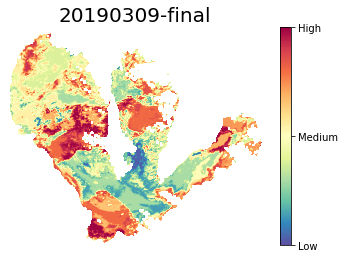

In [13]:
rd.df_to_raster(df['prediction'],
        f'{raster_name}',
        'reg')